In [1]:
import csv
import numpy as np
from io import StringIO
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
data=pd.read_csv('Voice4PD.csv',sep=';',decimal=',',skiprows=1,usecols=[1,2,3,4,5],names=["Classe","Atonie","Debit","Irreg","Puissance"])
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [92]:
print(data.head())

  Classe  Atonie  Debit  Irreg  Puissance
0     HC    2.64   0.73   0.70       0.37
1     HC    0.58   0.55   1.41       1.29
2     HC    1.88   0.73   0.61       1.42
3     HC    0.58   1.53   0.64       1.66
4     HC    1.58   0.73   0.96       0.58


In [93]:
print(data.shape)

(113, 5)


In [94]:
data['Classe']=pd.Categorical(data["Classe"], ordered=False)
print(data.dtypes)

Classe       category
Atonie        float64
Debit         float64
Irreg         float64
Puissance     float64
dtype: object


In [95]:
print(data['Classe'].value_counts())

HC     38
PD     35
MSA    28
PSP    12
Name: Classe, dtype: int64


In [96]:
#print(data.loc[data['Classe']=="MSA",:])

In [97]:

data['Classe']=data['Classe'].cat.rename_categories([0,1,2,3])
""" 1 pour HC, 2 pour MSA, 3 pour PD, 4 pour PSP"""


' 1 pour HC, 2 pour MSA, 3 pour PD, 4 pour PSP'

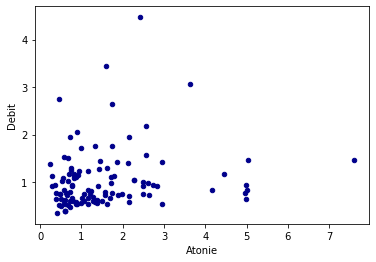

In [98]:
data.plot.scatter(x='Atonie', y='Debit', color='DarkBlue')


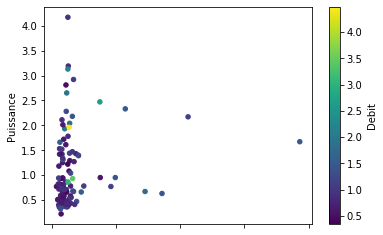

In [99]:
data.plot.scatter(x='Irreg', y='Puissance',c='Debit',colormap='viridis')

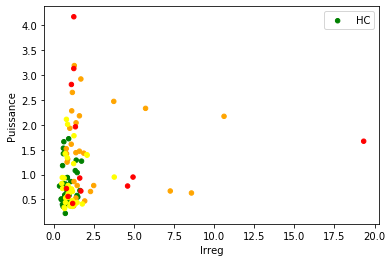

In [11]:
data.plot.scatter(x='Irreg', y='Puissance',
                  c=pd.Series(['green','orange','yellow','red'])[data['Classe']],label='HC')



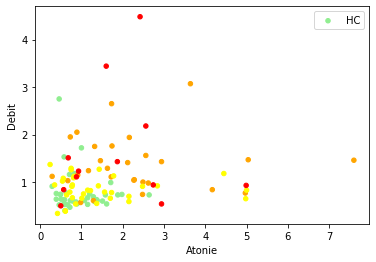

In [12]:
data.plot.scatter(x='Atonie', y='Debit',
                  c=pd.Series(['LightGreen','orange','yellow','red'])[data['Classe']],label='HC')

In [13]:
data_train,data_test= train_test_split(data, test_size=0.33)

#print(data_train.shape)
#print(data_test.shape)

In [14]:
lda = LinearDiscriminantAnalysis()

x_train=data_train[['Atonie','Debit','Puissance','Irreg']]
x_test=data_test[['Atonie','Debit','Puissance','Irreg']]

classe_test=data_test['Classe']
print(classe_test)

classe_train=data_train['Classe']
print(classe_train)

16     0
46     1
107    3
40     1
42     1
59     1
7      0
106    3
24     0
85     2
86     2
98     2
68     2
78     2
56     1
15     0
71     2
18     0
32     0
0      0
31     0
52     1
17     0
84     2
43     1
102    3
95     2
75     2
57     1
65     1
30     0
1      0
38     1
48     1
111    3
4      0
8      0
103    3
Name: Classe, dtype: category
Categories (4, int64): [0, 1, 2, 3]
63     1
39     1
20     0
69     2
19     0
      ..
47     1
110    3
97     2
12     0
13     0
Name: Classe, Length: 75, dtype: category
Categories (4, int64): [0, 1, 2, 3]


[0.88822339 0.10109187 0.01068474]


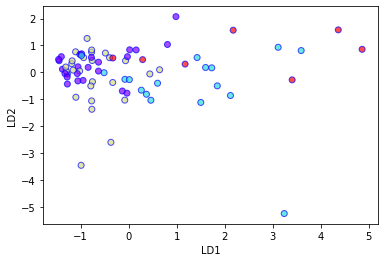

In [15]:
X_lda = lda.fit_transform(x_train, classe_train)
print(lda.explained_variance_ratio_)

#data as a function of the two LDA components
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=classe_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)


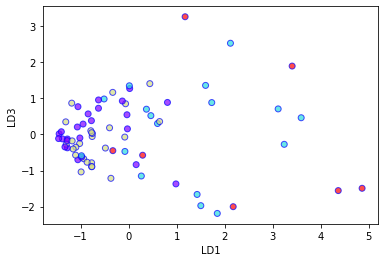

In [16]:
plt.xlabel('LD1')
plt.ylabel('LD3')
plt.scatter(
    X_lda[:,0],
    X_lda[:,2],
    c=classe_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

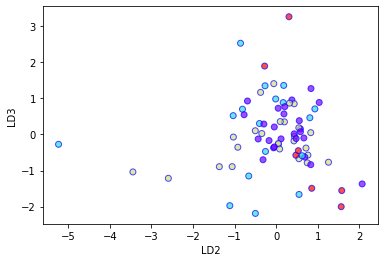

In [17]:
plt.xlabel('LD2')
plt.ylabel('LD3')
plt.scatter(
    X_lda[:,1],
    X_lda[:,2],
    c=classe_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [18]:
predict_classe=[]
for i in range(x_test.shape[0]):
    predict_classe.append(lda.predict([x_test.iloc[i,:]])[0])

print(predict_classe)
print(classe_test)

[0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 3, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2]
16     0
46     1
107    3
40     1
42     1
59     1
7      0
106    3
24     0
85     2
86     2
98     2
68     2
78     2
56     1
15     0
71     2
18     0
32     0
0      0
31     0
52     1
17     0
84     2
43     1
102    3
95     2
75     2
57     1
65     1
30     0
1      0
38     1
48     1
111    3
4      0
8      0
103    3
Name: Classe, dtype: category
Categories (4, int64): [0, 1, 2, 3]


In [19]:
# test des nouveaux patients
print(lda.predict([[3.11,2.37,1.10,1.19]]))
print(lda.predict([[1.00,2.86,1.64,1.39]]))
print(lda.predict([[1.73,2.02,1.45,0.87]]))

[1]
[3]
[1]


## ACP

In [20]:
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

In [21]:
#transformation – centrage-réduction
data_CR = sc.fit_transform(data[['Atonie','Debit','Irreg','Puissance']])    #on enlève la variable Classe
print(data_CR)

[[ 8.75211539e-01 -4.84592563e-01 -3.97450852e-01 -9.15395869e-01]
 [-7.65140652e-01 -7.69712978e-01 -8.15455433e-02  3.32827564e-01]
 [ 2.70033061e-01 -4.84592563e-01 -4.37495187e-01  5.09206962e-01]
 [-7.65140652e-01  7.82609280e-01 -4.24147075e-01  8.34830467e-01]
 [ 3.11468197e-02 -4.84592563e-01 -2.81767218e-01 -6.30475303e-01]
 [ 3.49661808e-01 -4.68752540e-01  6.52836846e-02  3.05692272e-01]
 [-1.36073549e-01 -6.42992794e-01 -4.41944557e-01 -3.04851798e-01]
 [-6.53660406e-01 -8.96433163e-01 -3.39609035e-01 -4.94798843e-01]
 [-1.28110675e-01 -6.74672840e-01 -3.75203999e-01 -3.18419445e-01]
 [-8.60695148e-01 -8.17233047e-01 -2.46172253e-01 -7.93287055e-01]
 [-3.74959791e-01 -6.74672840e-01 -3.61855888e-01 -4.40528259e-01]
 [-7.49214902e-01 -1.00731332e+00 -3.26260923e-01 -1.42040046e-01]
 [-8.20880775e-01 -6.27152771e-01 -4.06349593e-01 -8.61125285e-01]
 [-5.18291536e-01 -7.85553001e-01 -1.08241767e-01  4.79069979e-02]
 [-6.61623280e-01  1.96528428e-01 -4.15248334e-01 -9.15395869e

In [22]:
#verif que les moyennes sont presques nulles

print(np.mean(data_CR,axis=0))

[-1.86674668e-17  1.93183719e-16 -9.03898392e-17  5.45286530e-17]


In [23]:
#vérif écart-type bien unitaire

print(np.std(data_CR,axis=0,ddof=0))

[1. 1. 1. 1.]


In [24]:
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver='full')

print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [25]:
#calculs
coord = acp.fit_transform(data_CR)

#nombre de composantes calculées
print(acp.n_components_) # 4 variables explicatives

4


In [26]:
#valeurs singulières
n=data.shape[0]
print(n)

print(acp.singular_values_**2/n)

113
[1.58820116 0.95586346 0.77325604 0.68267934]


In [27]:
#proportion de variance expliquée

print(acp.explained_variance_ratio_)

"""la premiere composante concentre 39.7% de l'info,  """

[0.39705029 0.23896586 0.19331401 0.17066984]


"la premiere composante concentre 39.7% de l'info,  "

In [28]:
#val propres corrigées
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.58820116 0.95586346 0.77325604 0.68267934]


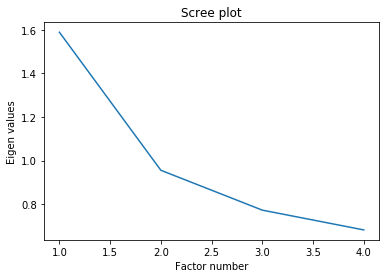

In [29]:
#scree plot: graphique des val propres en fonction des 4 facteurs

p=4    #nb de var explicatives donc ici 4

plt.plot(np.arange(1,p+1),eigval) 
plt.title("Scree plot") 
plt.ylabel("Eigen values") 
plt.xlabel("Factor number") 
plt.show()

In [30]:
"""nombre de facteurs a retenir?"""

#calcul seuil
print(np.arange(p,0,-1))

bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)

#inversion du vecteur: [1,2,3] devient [3,2,1]
bs = bs[::-1]
print(bs)

[4 3 2 1]
[2.08333333 1.08333333 0.58333333 0.25      ]


In [31]:
#test des bâtons brisés

print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

"""on compare la valeur propre au seuil et on ne garde normalement que les composantes 
pour lesquelles le seuil est inferieurs a la vp"""

   Val.Propre    Seuils
0    1.588201  2.083333
1    0.955863  1.083333
2    0.773256  0.583333
3    0.682679  0.250000


'on compare la valeur propre au seuil et on ne garde normalement que les composantes \npour lesquelles le seuil est inferieurs a la vp'

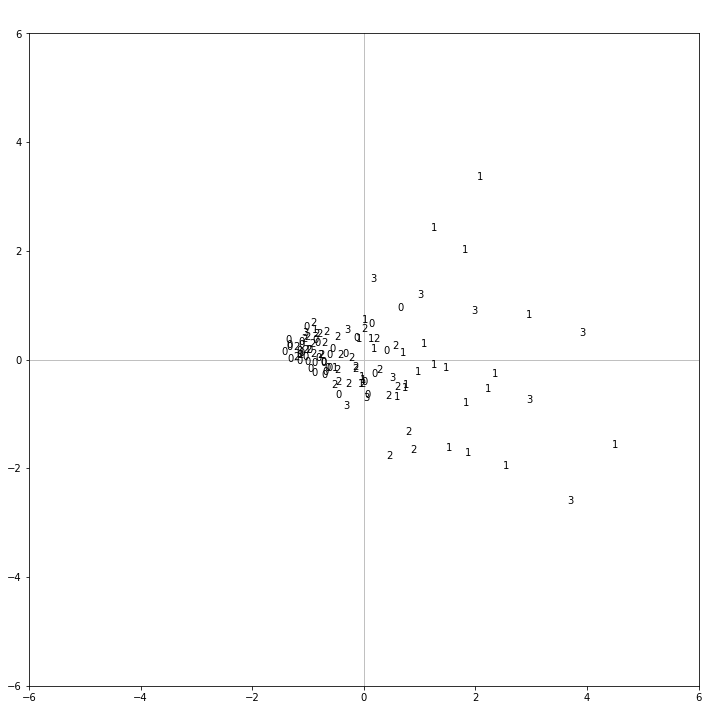

In [32]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-6,6)  
axes.set_ylim(-6,6)    

#placement des étiquettes des observations
for i in range(n):
    plt.annotate(data['Classe'][i],(coord[i,0],coord[i,1]))
    
#ajout des axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.show()

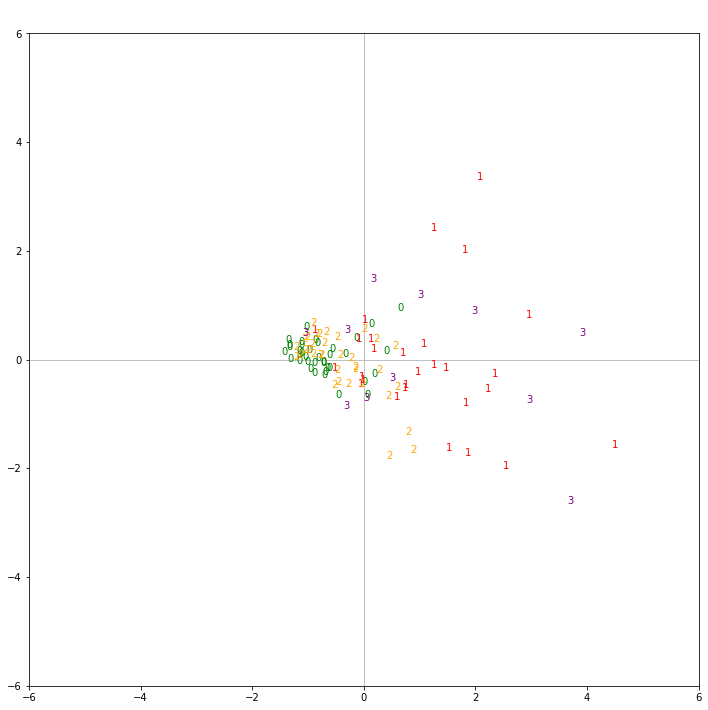

In [33]:
#graphique en coloriant les points

couleur=['green','red','orange','purple']
modalites=['0','1','2','3']

fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
    
    #numéro des individus concernés
    mod=int(modalites[c])
    numero = np.where(data['Classe'] == mod)
    
    #les passer en revue pour affichage
    for i in numero[0]: 
        plt.annotate(data['Classe'][i],(coord[i,0],coord[i,1]),color=couleur[c])
            
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

In [34]:
np.where(data['Classe']==1)

(array([38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),)

In [35]:
#contribution des individus dans l'inertie totale
di = np.sum(data_CR**2,axis=1) 
print(pd.DataFrame({'ID':data['Classe'],'d_i':di}))

    ID        d_i
0    0   1.996742
1    0   1.295322
2    0   0.758442
3    0   2.074760
4    0   0.712692
..  ..        ...
108  3  14.527969
109  3  63.962741
110  3   0.591815
111  3  25.573560
112  3   2.231251

[113 rows x 2 columns]


In [36]:
# vecteurs propres pour l'analyse des variables
#on a 4 vecteurs associés aux 4variables; ATTENTION Variables en colonnes et facteurs en ligne : on va en tenir compte
print(acp.components_)

[[ 0.49140546  0.52056952  0.39184592  0.5779142 ]
 [-0.57763881  0.21789469  0.75595987 -0.21766944]
 [-0.28782079  0.80681309 -0.4946919  -0.14660064]
 [-0.58481901 -0.17487685 -0.17395796  0.77275057]]


In [37]:
 #racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
print(sqrt_eigval)

[1.26023853 0.9776827  0.87934978 0.82624412]


In [38]:
#corrélation des variables avec les axes
#p=4 var
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
    
#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.61928809 -0.56474747 -0.25309515 -0.48320327]
 [ 0.65604177  0.21303187  0.70947092 -0.14449097]
 [ 0.49381933  0.73908888 -0.43500722 -0.14373174]
 [ 0.72830975 -0.21281164 -0.12891324  0.63848061]]


In [39]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':data[['Atonie','Debit','Irreg','Puissance']].columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

          id     COR_1     COR_2
0     Atonie  0.619288 -0.564747
1      Debit  0.656042  0.213032
2      Irreg  0.493819  0.739089
3  Puissance  0.728310 -0.212812


F1= 0.62*Atonie + 0.65*Debit + 0.49*Irreg + 0.73*Puissance \
F2= -0.56*Atonie + 0.21*Debit + 0.74*Irreg - 0.21*Puissance

In [40]:
couleur=['royalblue','teal','orangered','deeppink']

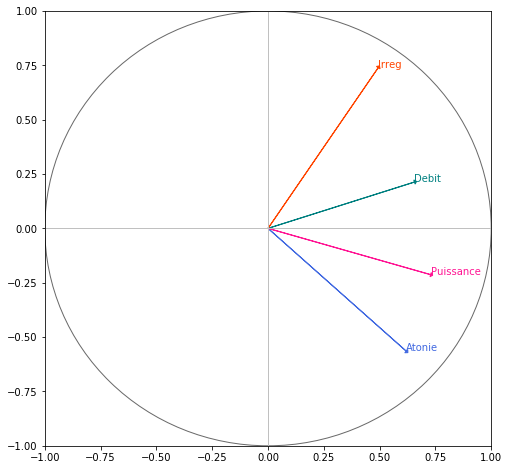

In [41]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(data[['Atonie','Debit','Irreg','Puissance']].columns[j],(corvar[j,0],corvar[j,1]),color=couleur[j])
    plt.arrow(0,0,corvar[j,0],corvar[j,1],head_width = 0.02, head_length = 0.01, color=couleur[j])
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='dimgrey',fill=False) 
axes.add_artist(cercle)

plt.show()

On cherches variables corrélées entre elles, l'axe des abscisses correspond au premier facteur et celui 
des ordonnées au second facteur ( les composantes principales). On  regarde la projection des variables sur ces axes
Les variables les plus corrélées a F1 sont Débit et Puissance. Irreg et corrélée positivement avec F2 et Atonies négativement a F2. \
Ici flèches assez longues donc bien représentées sur le plan factoriel \
Il faut trouver une notion communes a chaque facteur\
F2 tonicité? \
Si angle entre les flèches vaut 90 degres alors cos(angle)=0=corr alors variable non corrélée

## PLS DA
PLS-DA Version discriminante. La variable Y qualitative à q classes est remplacée par q variables indicatrices (dummy variables) de ces classes.

In [42]:
from sklearn.cross_decomposition import PLSRegression

In [43]:
plsr = PLSRegression(n_components=4, scale=False) 
plsr.fit(data[['Atonie','Debit','Irreg','Puissance']].values, data['Classe'])

PLSRegression(copy=True, max_iter=500, n_components=4, scale=False, tol=1e-06)

In [44]:
#data[['Atonie','Debit','Irreg','Puissance']].values

In [45]:
#Scores and weights:
plsr.x_scores_
print(np.shape(plsr.x_scores_)) #on retrouve bien 113 lignes pour chaque individus et 4 colonnes pour chaque variable
#le score décrit la position de chaque échantillon par rapport a la variable latente
#le poids correspond a la contribution de chaque variable a chaque variable latente`
print(plsr.x_weights_.shape) # on a 4 colonnes pr chaque variable latente 

(113, 4)
(4, 4)


In [46]:
colormap = {
    '0': 'green',  
    '1': 'orange',
    '3':'purple',
    '2':'yellow'
}
colorlist = [colormap[str(c)] for c in data['Classe']]

Text(0, 0.5, 'Scores on LV 2')

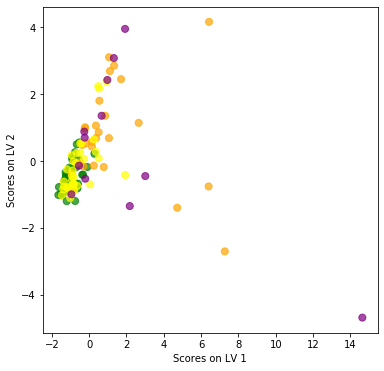

In [47]:
scores = pd.DataFrame(plsr.x_scores_)
ax = scores.plot(x=0, y=1, kind='scatter', s=50, alpha=0.7, c=colorlist, figsize=(6,6))
ax.set_xlabel('Scores on LV 1')
ax.set_ylabel('Scores on LV 2')

Text(0, 0.5, 'Scores on LV 3')

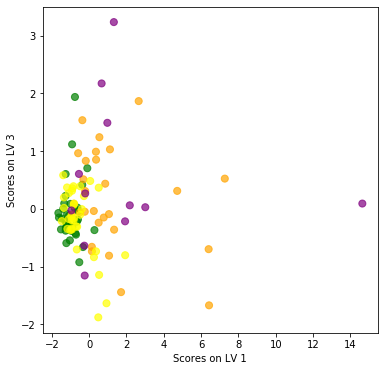

In [48]:
scores = pd.DataFrame(plsr.x_scores_)
ax = scores.plot(x=0, y=2, kind='scatter', s=50, alpha=0.7, c=colorlist, figsize=(6,6))
ax.set_xlabel('Scores on LV 1')
ax.set_ylabel('Scores on LV 3')

Text(0, 0.5, 'Scores on LV 4')

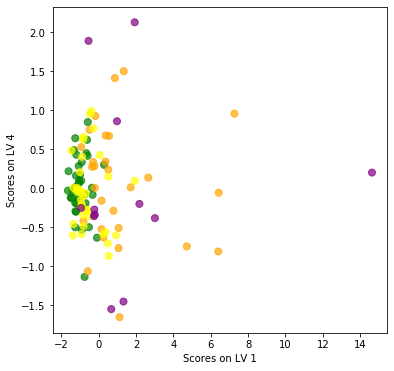

In [49]:
scores = pd.DataFrame(plsr.x_scores_)
ax = scores.plot(x=0, y=3, kind='scatter', s=50, alpha=0.7, c=colorlist, figsize=(6,6))
ax.set_xlabel('Scores on LV 1')
ax.set_ylabel('Scores on LV 4')

Text(0, 0.5, 'Scores on LV 3')

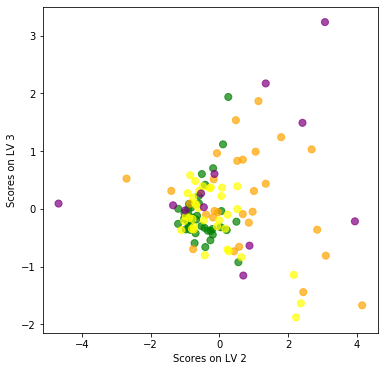

In [50]:
scores = pd.DataFrame(plsr.x_scores_)
ax = scores.plot(x=1, y=2, kind='scatter', s=50, alpha=0.7, c=colorlist, figsize=(6,6))
ax.set_xlabel('Scores on LV 2')
ax.set_ylabel('Scores on LV 3')

Text(0, 0.5, 'Scores on LV 3')

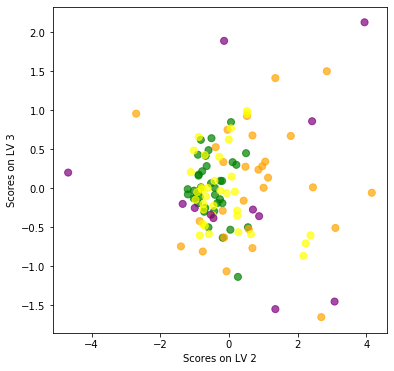

In [51]:
scores = pd.DataFrame(plsr.x_scores_)
ax = scores.plot(x=1, y=3, kind='scatter', s=50, alpha=0.7, c=colorlist, figsize=(6,6))
ax.set_xlabel('Scores on LV 2')
ax.set_ylabel('Scores on LV 3')

In [52]:
for (x,y) in enumerate(scores.values): 
    print(y)

[-0.52653811  0.55426007 -0.92285595 -0.50039975]
[-0.62667596 -0.81856292  0.02226147  0.62106116]
[-0.66185605  0.4976681  -0.2210984   0.44982207]
[-0.91252719  0.10688934  1.11808504  0.33428368]
[-0.70604315 -0.19081105 -0.4458375  -0.19117912]
[ 0.2839374   0.21478648 -0.36683484  0.30081392]
[-1.06077218 -0.19891664 -0.34697745  0.09374954]
[-1.2215852  -0.88655495 -0.31051456  0.16230979]
[-0.93984582 -0.24653291 -0.38113533  0.09528232]
[-1.19814316 -1.20131714 -0.25875481 -0.012402  ]
[-1.06807753 -0.52076897 -0.29737472  0.06376652]
[-1.20159947 -0.90436682 -0.23109972  0.43034623]
[-1.45624251 -1.02548885 -0.16667845 -0.12917934]
[-0.60035061 -0.67756104 -0.18445504  0.41653565]
[-1.25948503 -0.59635839  0.22647634 -0.50184187]
[-1.17833428 -0.90314739 -0.08796684 -0.19299597]
[-1.50786142 -0.97645824 -0.35494843 -0.11784107]
[-1.61578471 -0.77960477 -0.14967824  0.21826564]
[-1.26621374 -0.81479575 -0.21041049  0.0124767 ]
[-1.07796867 -0.8521586  -0.36104241 -0.11084026]


### enlever valeur 109 aberrante

'on va enlever le 109'

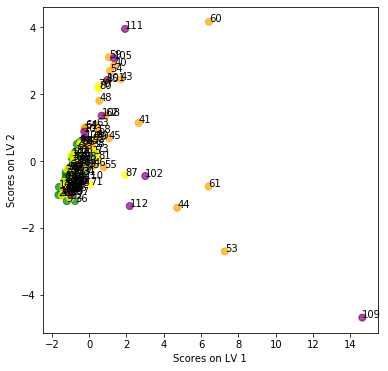

In [53]:
#enlever une valeur 
scores = pd.DataFrame(plsr.x_scores_)

ax = scores.plot(x=0, y=1, kind='scatter', s=50, alpha=0.7,
                 c=colorlist, figsize=(6,6))
ax.set_xlabel('Scores on LV 1')
ax.set_ylabel('Scores on LV 2')

for (x, y) in enumerate(scores.values): 
    label=x
    ax.text(y[0],y[1],label)
    
'''on va enlever le 109'''

In [83]:
data.drop(data.index[109],0, inplace=True)
data

,Classe,Atonie,Debit,Irreg,Puissance
0,0,2.64,0.73,0.70,0.37
1,0,0.58,0.55,1.41,1.29
2,0,1.88,0.73,0.61,1.42
3,0,0.58,1.53,0.64,1.66
4,0,1.58,0.73,0.96,0.58
...,...,...,...,...,...
107,3,0.57,0.84,1.19,0.42
108,3,1.60,3.44,1.63,0.93
110,3,0.93,1.23,1.70,0.67
111,3,4.99,0.93,1.26,4.17


In [84]:
plsr_new = PLSRegression(n_components=4, scale=False) 
plsr_new.fit(data[['Atonie','Debit','Irreg','Puissance']].values, data['Classe'])

colorlist_new = [colormap[str(c)] for c in data['Classe']]

Text(0, 0.5, 'Scores on LV 2')

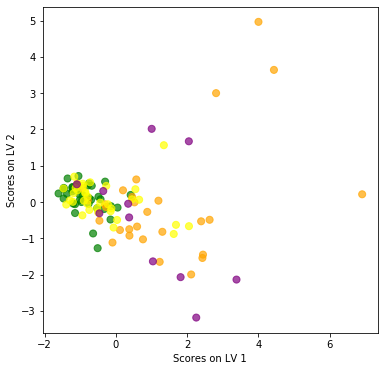

In [86]:
scores_new = pd.DataFrame(plsr_new.x_scores_)
ax_new = scores_new.plot(x=0, y=1, kind='scatter', s=50, alpha=0.7, c=colorlist_new, figsize=(6,6))
ax_new.set_xlabel('Scores on LV 1')
ax_new.set_ylabel('Scores on LV 2')

Text(0, 0.5, 'Scores on LV 3')

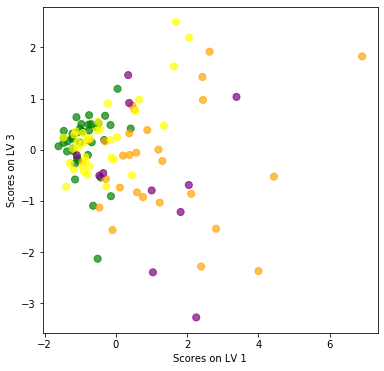

In [87]:
ax_new = scores_new.plot(x=0, y=2, kind='scatter', s=50, alpha=0.7, c=colorlist_new, figsize=(6,6))
ax_new.set_xlabel('Scores on LV 1')
ax_new.set_ylabel('Scores on LV 3')

Text(0, 0.5, 'Scores on LV 4')

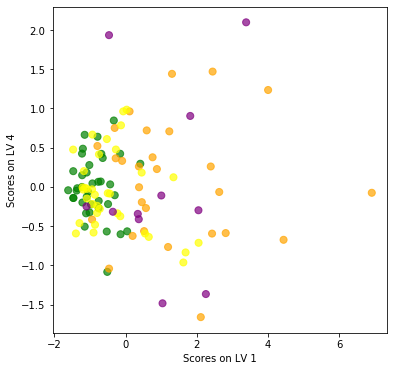

In [88]:
ax_new = scores_new.plot(x=0, y=3, kind='scatter', s=50, alpha=0.7, c=colorlist_new, figsize=(6,6))
ax_new.set_xlabel('Scores on LV 1')
ax_new.set_ylabel('Scores on LV 4')

## Random Forest

In [262]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
#seed= 42
train_data, test_data, train_labels, test_labels = train_test_split(data[['Atonie','Debit','Irreg','Puissance']],data['Classe'], test_size = 0.20)

In [263]:
#we check the sizes of our samples
print('Training data Shape:', train_data.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing data Shape:', test_data.shape)
print('Testing Labels Shape:', test_labels.shape)

Training data Shape: (90, 4)
Training Labels Shape: (90,)
Testing data Shape: (23, 4)
Testing Labels Shape: (23,)


#### Train model

In [264]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000)

# Train the model on training data
rf.fit(train_data, train_labels);

#### Prediction on the test data

In [265]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_data)

test_values=np.zeros(len(test_labels))

for i in range(len(test_labels)):
    if test_labels.values[i]==0:
        test_values[i]=0
    elif test_labels.values[i]==1:
        test_values[i]=1
    elif test_labels.values[i]==2:
        test_values[i]=2
    else :
        test_values[i]=3


#taux de mal classés : 
error=(np.count_nonzero(abs(test_values-predictions) !=0))/len(test_labels)
print(error)

0.5217391304347826


In [272]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

FileNotFoundError: [Errno 2] "dot" not found in path.

In [271]:
data.index

RangeIndex(start=0, stop=113, step=1)